Class Distribution:
Scarcity         677
Social Proof     314
Misdirection     237
Urgency          237
Obstruction       30
Sneaking          12
Forced Action      4
Name: Pattern Category, dtype: int64

Class Imbalance Ratio: 0.005908419497784343


C:\Users\death\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Multinomial Naive Bayes:  {'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}


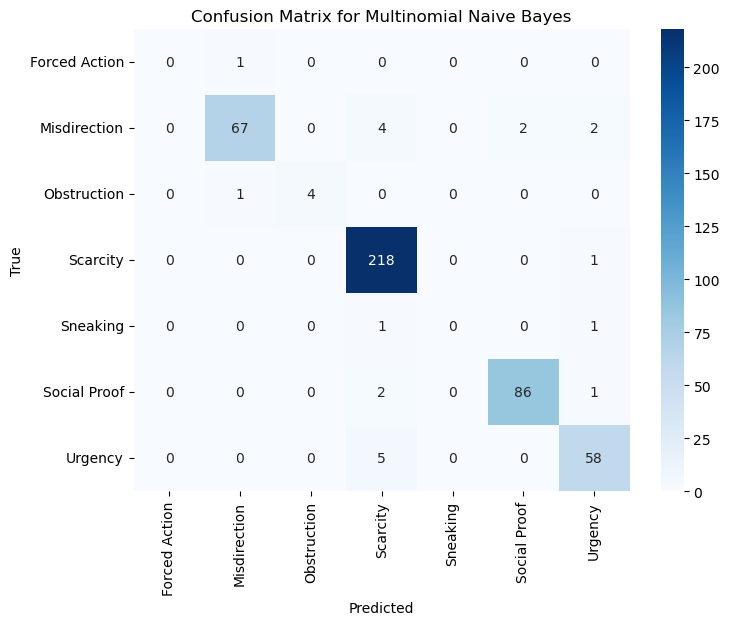

C:\Users\death\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\death\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\death\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Best parameters for Logistic Regression:  {'clf__C': 10, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


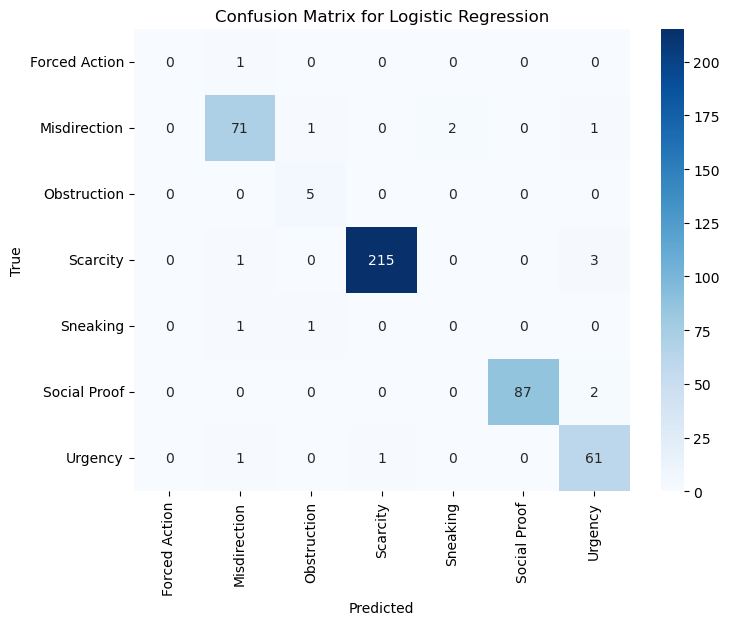

C:\Users\death\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Support Vector Machine:  {'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


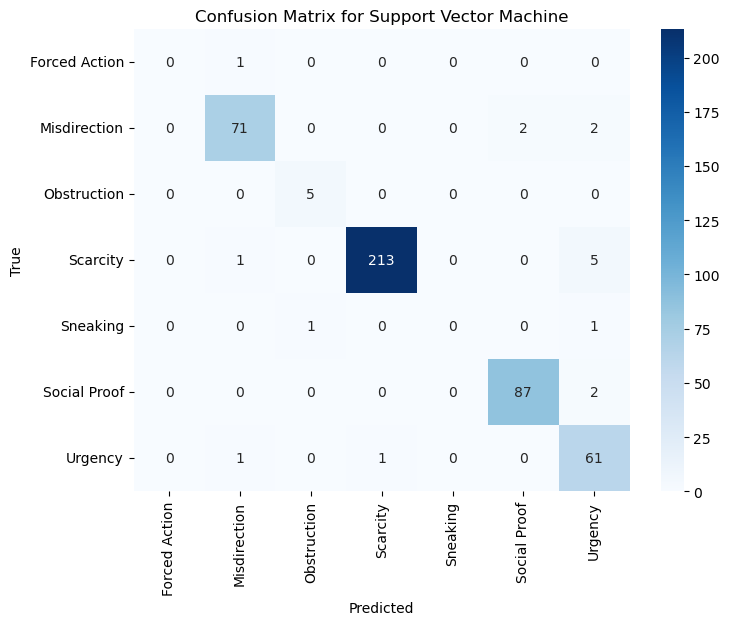

C:\Users\death\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest:  {'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}


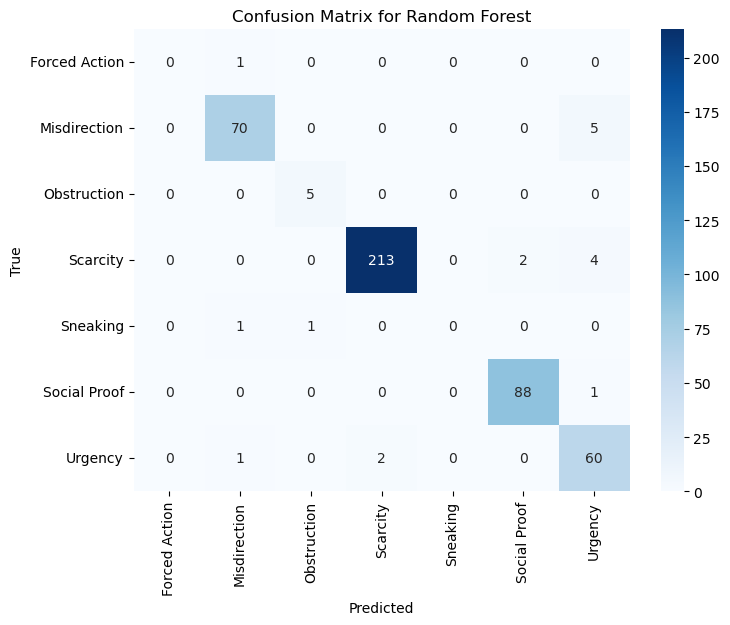

C:\Users\death\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Gradient Boosting:  {'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


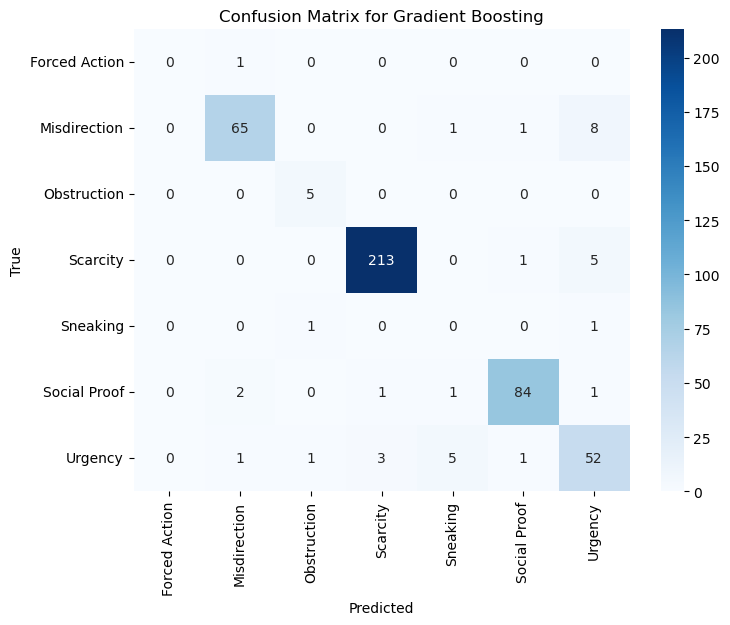

Multinomial Naive Bayes Accuracy: 0.9537
Logistic Regression Accuracy: 0.9670
Support Vector Machine Accuracy: 0.9626
Random Forest Accuracy: 0.9604
Gradient Boosting Accuracy: 0.9229


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from joblib import dump
import seaborn as sns

selected_classification = "Pattern Category"

df = pd.read_csv('dark_patterns.csv')

df = df[pd.notnull(df["Pattern String"])]
df = df.drop_duplicates()
col = ["Pattern String", selected_classification]
df = df[col]

df["category_id"] = df[selected_classification].factorize()[0]

# Calculate class distribution
class_distribution = df[selected_classification].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate class imbalance ratio
imbalance_ratio = class_distribution.min() / class_distribution.max()

# Print class imbalance ratio
print("\nClass Imbalance Ratio:", imbalance_ratio)

X_train, X_test, y_train, y_test = train_test_split(
    df['Pattern String'], df[selected_classification], train_size=.7, random_state=42)

# Create a list of classifiers
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Create an array to store accuracies
accuracies = []

for name, clf in classifiers:
    # Create a pipeline with vectorizer and classifier
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', clf)
    ])

    # Define the parameter grid for grid search
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
    }

    # Adjust parameters for Logistic Regression
    if name == 'Logistic Regression':
        parameters['clf__C'] = [0.001, 0.01, 0.1, 1, 10, 100]

    grid_search = GridSearchCV(text_clf, parameters, cv=StratifiedKFold(n_splits=5))
    grid_search.fit(X_train, y_train)

    # Print the best parameters found by grid search
    print(f"Best parameters for {name}: ", grid_search.best_params_)

    # Fit the model with the best parameters
    best_clf = grid_search.best_estimator_
    best_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)

    # Calculate accuracy
    acc = metrics.accuracy_score(y_pred, y_test)
    
    # Save the result
    accuracies.append((name, acc))
    
    # Calculate confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Print the results
for name, acc in accuracies:
    print(f'{name} Accuracy: {acc:.4f}')


In [11]:
# Evaluate the best performing classifier on the test set
best_classifier_name, best_classifier_acc = max(accuracies, key=lambda x: x[1])
print(f"\nBest Performing Classifier: {best_classifier_name}, Accuracy: {best_classifier_acc:.4f}")



Best Performing Classifier: Logistic Regression, Accuracy: 0.9670


In [12]:
# Save the best model to disk
best_classifier_name, best_classifier_acc = max(accuracies, key=lambda x: x[1])

# cannot directly use best_classifier_name in the make_pipeline() function because best_classifier_name is a string
best_classifier = None
for name, clf in classifiers:
    if name == best_classifier_name:
        best_classifier = clf
        break

if best_classifier is not None:
    best_model = make_pipeline(CountVectorizer(), TfidfTransformer(), best_classifier)
    dump(best_model, 'best_model_categoryClassifier.joblib')
    print("Completed")
else:
    print("Error: Best classifier not found.")

Completed
